### Nama: Nabila Putri Damayanti
### No. Peserta: PYTN-KS18-021
### Batch: 5

NYC Property Sales Dataset merupakan dataset yang berasal dari Kaggle Repository. Dataset ini adalah catatan setiap gedung atau unit bangunan (apartemen, dll.) yang terjual di pasar properti Kota New York selama periode 12 bulan. Dataset ini memuat lokasi, alamat, tipe, harga jual, dan tanggal penjualan unit bangunan yang terjual.

##### Install dan Import Library

In [1]:
import numpy as np
import pandas as pd
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import norm

c:\Users\intan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Explore dan Preprocessing Data

Membaca Dataset

In [2]:
data = pd.read_csv('nyc-rolling-sales.csv')

Memeriksa ukuran dataset

In [3]:
data.shape

(84548, 22)

Melihat header list

In [4]:
data.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

Membaca informasi setiap kolom

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Membaca deskripsi setiap kolom

In [6]:
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


Membaca 5 data teratas

In [7]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Drop kolom yang tidak relevan

In [8]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

Memperbaiki tipe data, 'coerce' merupakan penguraian yang tidak valid, sehingga ditetapkan NaN

In [9]:
data['SALE DATE']= pd.to_datetime(data['SALE DATE'], errors='coerce')

Memeriksa dan mengelompokkan kolom bertipe data numerik

In [10]:
numerical_cols=["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numerical_cols: 
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [11]:
numerical_cols

['RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'SALE PRICE']

Memeriksa dan mengelompokkan kolom bertipe data categorical

In [12]:
categorical_cols = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 
               'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical_cols:
    data[col] = data[col].astype("category")

In [13]:
categorical_cols

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BUILDING CLASS AT PRESENT',
 'ZIP CODE',
 'YEAR BUILT',
 'BUILDING CLASS AT TIME OF SALE',
 'TAX CLASS AT TIME OF SALE']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

Memeriksa missing value

In [15]:
data.isna().sum()/len(data)

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.000000
BLOCK                             0.000000
LOT                               0.000000
EASE-MENT                         0.000000
BUILDING CLASS AT PRESENT         0.000000
ADDRESS                           0.000000
APARTMENT NUMBER                  0.000000
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.310498
GROSS SQUARE FEET                 0.326584
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.172222
SALE DATE                         0.000000
dtype: float64

Memeriksa data yang tidak valid

In [16]:
data.replace(' ',np.nan, inplace=True)
data.isna().sum() /len(data)

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.008729
BLOCK                             0.000000
LOT                               0.000000
EASE-MENT                         1.000000
BUILDING CLASS AT PRESENT         0.008729
ADDRESS                           0.000000
APARTMENT NUMBER                  0.774661
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.310498
GROSS SQUARE FEET                 0.326584
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.172222
SALE DATE                         0.000000
dtype: float64

Memeriksa duplikasi data

In [17]:
data.duplicated().sum()

765

Hapus data duplikat

In [18]:
data.drop_duplicates(inplace=True)

Hapus kolom yang memiliki terlalu banyak data tidak valid

In [19]:
data.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

Menampilkan skewness dari tiap kolom

In [20]:
data.skew(axis=0, skipna=True)

BLOCK                  1.046322
LOT                    3.506785
RESIDENTIAL UNITS     62.058053
COMMERCIAL UNITS     224.990028
TOTAL UNITS           65.249327
LAND SQUARE FEET      75.762320
GROSS SQUARE FEET     61.121216
SALE PRICE           123.943132
dtype: float64

Hitung missing value
1. Data numerik: skew <+-2 hubungkan dengan rata-rata, skew >+-2 hubungkan dengan median
2. Data categorical: hubungkan dengan mode

In [21]:
data["BUILDING CLASS AT PRESENT"]=data["BUILDING CLASS AT PRESENT"].fillna(data["BUILDING CLASS AT PRESENT"].mode())
data["TAX CLASS AT PRESENT"]=data["TAX CLASS AT PRESENT"].fillna(data["TAX CLASS AT PRESENT"].mode())
data["LAND SQUARE FEET"]=data["LAND SQUARE FEET"].fillna(data["LAND SQUARE FEET"].median())
data["GROSS SQUARE FEET"]=data["GROSS SQUARE FEET"].fillna(data["GROSS SQUARE FEET"].median())
data["SALE PRICE"]=data["SALE PRICE"].fillna(data["SALE PRICE"].median())

Memeriksa missing value

In [22]:
data.isna().sum()/len(data)

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.008808
BLOCK                             0.000000
LOT                               0.000000
BUILDING CLASS AT PRESENT         0.008808
ADDRESS                           0.000000
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.000000
GROSS SQUARE FEET                 0.000000
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.000000
SALE DATE                         0.000000
dtype: float64

Membaca 5 data teratas

In [23]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,533000.0,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,533000.0,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


Memeriksa kembali data

In [24]:
data.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,8.378300e+04,8.378300e+04,8.378300e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.375438e+03,3.170620e+03,1.154192e+06
std,3568.789482,658.021286,16.569118,8.576582,18.777727,3.449485e+04,2.860114e+04,1.042234e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,3.000000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,2.650000e+03,2.080000e+03,8.350000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


Hapus data yang memiliki nilai 0

In [25]:
print("YEAR BUILT '0' Count: ",data[data['YEAR BUILT']==0]['YEAR BUILT'].count())
print("TOTAL UNIT '0' Count: ",data[data['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("SALE PRICE '0' Count: ",data[data['SALE PRICE']==0]['SALE PRICE'].count())

YEAR BUILT '0' Count:  6885
TOTAL UNIT '0' Count:  19677
SALE PRICE '0' Count:  10012


In [26]:
data['YEAR BUILT'].replace(0, np.nan, inplace=True)
data['TOTAL UNITS'].replace(0, np.nan, inplace=True)
data['SALE PRICE'].replace(0, np.nan, inplace=True)

In [27]:
print("YEAR BUILT '0' Count: ",data[data['YEAR BUILT']==0]['YEAR BUILT'].count())
print("TOTAL UNIT '0' Count: ",data[data['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("SALE PRICE '0' Count: ",data[data['SALE PRICE']==0]['SALE PRICE'].count())

YEAR BUILT '0' Count:  0
TOTAL UNIT '0' Count:  0
SALE PRICE '0' Count:  0


In [28]:
data.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,64106.000000,8.378300e+04,8.378300e+04,7.377100e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.892927,3.375438e+03,3.170620e+03,1.310836e+06
std,3568.789482,658.021286,16.569118,8.576582,21.421223,3.449485e+04,2.860114e+04,1.109785e+07
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,4.300000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,2.650000e+03,2.080000e+03,9.113330e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


Drop missing value

In [29]:
data.dropna(inplace=True)

Membuat visualisasi boxplot 'SALE PRICE' untuk melihat outliers

c:\Users\intan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


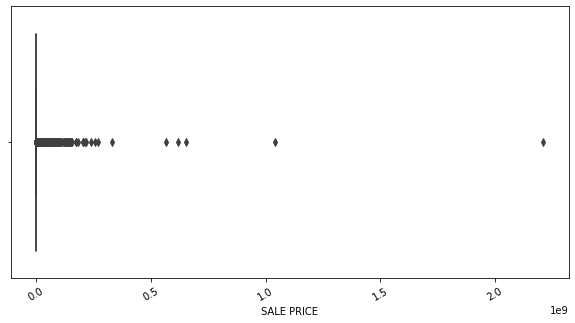

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(data["SALE PRICE"])
plt.xticks(rotation=30)
plt.show()

Filter 'SALE PRICE' karena terlalu banyak outliers

In [31]:
df = data[(data['SALE PRICE'] > 10000) & (data['SALE PRICE'] < 800000)]

Visualisasikan hasil filter menggunakan boxplot

c:\Users\intan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


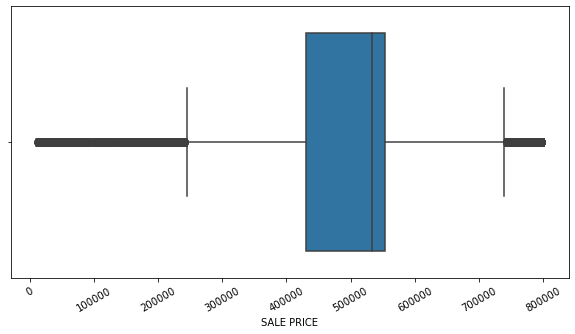

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(df["SALE PRICE"])
plt.xticks(rotation=30)
plt.show()

Encode kolom 'BOROUGH'

In [33]:
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df.head()

<ipython-input-33-6e30ca23cc75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31.0,4616.0,18690.0,1900,2,C7,533000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17.0,2212.0,7803.0,1900,2,C7,533000.0,2016-12-09
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,10009,20,0,20.0,2581.0,9730.0,1900,2,C4,533000.0,2017-07-20
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,10009,44,2,46.0,5163.0,21007.0,1900,2,C7,533000.0,2017-07-20
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,10009,15,0,15.0,1534.0,9198.0,1920,2,D5,533000.0,2017-06-20


##### Statistik Deskriptif

Mean, Median, Modus, dan Standard Deviasi

In [34]:
# Mendeskripsikan data bertipe integer
data.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,51546.000000,51546.000000,51546.000000,51546.000000,51546.000000,5.154600e+04,5.154600e+04,5.154600e+04
mean,4681.904299,390.366779,2.642572,0.254608,2.924223,3.631110e+03,3.796526e+03,1.473624e+06
std,3857.431331,624.621609,19.929753,10.878912,22.845330,3.271282e+04,3.385411e+04,1.301164e+07
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00
25%,1413.000000,26.000000,1.000000,0.000000,1.000000,2.000000e+03,1.368000e+03,5.000000e+05
50%,3814.000000,55.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.380000e+05
75%,6890.000000,1006.000000,2.000000,0.000000,2.000000,3.325000e+03,2.304000e+03,9.500000e+05
max,16322.000000,8160.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2.210000e+09


Pada tabel di atas dapat dilihat mean, median, dan standard deviasi pada kolom bertipe integer

In [35]:
# Mendeskripsikan data bertipe object
data.describe(include='category')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
count,51546,51546,51546,51546,51546,51546,51546,51546,51546
unique,5,252,44,9,150,186,149,3,151
top,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,R4,10314,1920,1,R4
freq,19961,2365,16675,32624,9569,1616,4646,33766,9571


Pada tabel di atas dapat dilihat total data unik, modus, dan frekuensi data modus pada kolom bertipe object

Berapa mean 'SALE PRICE' dari setiap 'BOROUGH'?

In [36]:
mean = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True)
mean

,SALE PRICE
BOROUGH,
Bronx,448221.910236
Staten Island,475511.350783
Brooklyn,506525.692929
Queens,512513.827403
Manhattan,540871.630934


Berdasarkan hasil di atas dapat disimpulkan bahwa wilayah Manhattan memiliki rata-rata harga tertinggi dan wilayah Bronx memiliki rata-rata harga terendah

Berapa mean 'BOROUGH' untuk setiap kolom bertipe data numerik?

In [37]:
mean_ = df.groupby('BOROUGH').mean()
mean_

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,1162.235775,1042.289532,5.520277,0.942471,6.589437,2984.648538,9445.558001,540871.630934
Bronx,4227.301582,121.418147,2.142719,0.046497,2.189538,2657.919600,2368.765580,448221.910236
Brooklyn,5072.049242,377.465629,1.748867,0.062438,1.836912,1953.229860,1703.881032,506525.692929
Queens,7719.626989,232.077177,2.194592,0.223315,2.454457,3907.603830,2873.149243,512513.827403
Staten Island,3256.191901,216.170312,1.306759,0.059546,1.369268,4336.345703,1886.482856,475511.350783


Berdasarkan hasil di atas dapat disimpulkan bahwa wilayah Manhattan mayoritas memiliki rata-rata tertinggi dari kolom yang ada

Berapa median 'SALE PRICE' dari setiap 'BOROUGH'?

In [38]:
median = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=True)
median

,SALE PRICE
BOROUGH,
Bronx,450000.0
Manhattan,533000.0
Queens,533000.0
Staten Island,533000.0
Brooklyn,534900.0


Berdasarkan hasil di atas dapat disimpulkan median 'SALE PRICE' terendah berada di wilayah Bronx dan tertinggi berada di wilayah 'Brooklyn'

Berapa 'TOTAL UNITS' dari setiap kolom 'BOROUGH'?

In [39]:
mode = df[['BOROUGH','TOTAL UNITS']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
mode

,BOROUGH,TOTAL UNITS
0,Manhattan,1.0
1,Bronx,2.0
2,Brooklyn,1.0
3,Queens,1.0
4,Staten Island,1.0


Berdasarkan hasil di atas dapat disimpulkan bahawa Bronx memiliki 'TOTAL UNITS' paling banyak, yaitu 2 unit.

Berapa standard deviasi dari setiap 'BOROUGH'?

In [40]:
std = df.groupby('BOROUGH').std()
std

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,557.536507,845.418527,37.607815,12.831473,39.899511,7102.332724,58555.852895,109221.638628
Bronx,948.850527,273.451786,9.017549,0.268564,9.016095,3685.189370,8424.220830,158570.756499
Brooklyn,2534.189819,543.505746,6.344534,0.358178,6.348448,15512.068491,8353.995550,195792.624077
Queens,4447.559356,477.682420,23.298789,18.192623,29.726521,48836.893171,43898.586270,135339.181140
Staten Island,2263.547069,453.753887,2.448830,1.533835,2.869556,28037.964065,8557.307363,139262.818182


Berdasarkan hasil di atas dapat disimpulkan bahwa mayoritas BOROUGH memiliki nilai standard deviasi tinggi, sehingga data berdistribusi besar.

##### Range dan Variance

In [41]:
# Menghitung range data (harga maksimum dan minimum) pada kolom 'SALE PRICE'
sale_price = data["SALE PRICE"]

range_sale_price = sale_price.max() - sale_price.min()
print("Range harga maksimum dan minimum adalah ", range_sale_price)

Range harga maksimum dan minimum adalah  2209999999.0


In [42]:
# Menghitung variance pada kolom 'SALE PRICE'
variance_sale_price = sale_price.var()
print("Variasi dari kolom 'SALE PRICE' adalah ", variance_sale_price)

Variasi dari kolom 'SALE PRICE' adalah  169302771932105.6


Berapa range 'SALE PRICE' dari setiap 'BOROUGH'?

In [43]:
range = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
range

BOROUGH
Manhattan        789450.0
Bronx            787000.0
Brooklyn         789286.0
Queens           789998.0
Staten Island    788500.0
dtype: float64

Berdasarkan hasil di atas dapat disimpulkan bahwa Queens memiliki range 'SALE PRICE' paling tinggi dan dari setiap BOROUGH memiliki range yang tidak berbeda jauh

Berapa variance dari setiap BOROUGH?

In [44]:
variance = df.groupby('BOROUGH').var()
variance

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,3.108470e+05,714732.485013,1414.347781,164.646689,1591.971008,5.044313e+07,3.428788e+09,1.192937e+10
Bronx,9.003173e+05,74775.879038,81.316188,0.072127,81.289968,1.358062e+07,7.096750e+07,2.514468e+10
Brooklyn,6.422118e+06,295398.495519,40.253114,0.128291,40.302790,2.406243e+08,6.978924e+07,3.833475e+10
Queens,1.978078e+07,228180.494205,542.833581,330.971542,883.666070,2.385042e+09,1.927086e+09,1.831669e+10
Staten Island,5.123645e+06,205892.589533,5.996769,2.352649,8.234353,7.861274e+08,7.322751e+07,1.939413e+10


Berdasarkan hasil di atas dapat disimpulkan bahwa variance yang dimiliki setiap BOROUGH adalah tinggi, sehingga berarti data berdistribusi besar

##### Probability Distribution

In [45]:
# Menghitung probability distribution
prob_distribution = data.value_counts() / len(data)

print(prob_distribution)

BOROUGH  NEIGHBORHOOD     BUILDING CLASS CATEGORY                      TAX CLASS AT PRESENT  BLOCK  LOT   BUILDING CLASS AT PRESENT  ADDRESS                ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  SALE PRICE  SALE DATE 
1        ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS               2                     399    26    C7                         234 EAST 4TH   STREET  10009     28                 3                 31.0         4616.0            18690.0            1900        2                          C7                              533000.0    2016-12-14    0.000019
4        JACKSON HEIGHTS  13 CONDOS - ELEVATOR APARTMENTS              2                     1433   1009  R4                         85-11 34TH   AVENUE    11372     1                  0                 1.0          2314.0            1680.0             1951        2                          R4

Probability distribution dapat dilihat pada output di atas

Distribusi probabilitas 'SALE PRICE' dari Manhattan

c:\Users\intan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'price'),
 Text(0, 0.5, 'probability of occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Manhattan')]

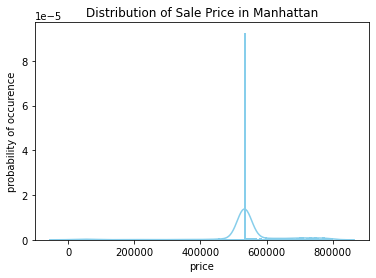

In [56]:
df1=df.groupby("BOROUGH")
br = df1.get_group('Manhattan')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='price', ylabel='probability of occurence', title='Distribution of Sale Price in Manhattan')

c:\Users\intan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


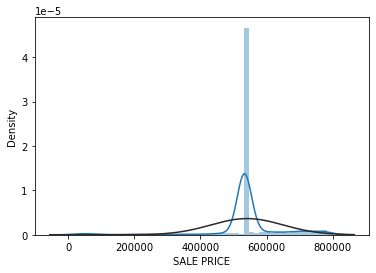

In [57]:
x = pd.Series(br['SALE PRICE'].values, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)

Distribusi probabilitas 'SALE PRICE' dari Manhattan

c:\Users\intan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'price'),
 Text(0, 0.5, 'probability of occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Bronx')]

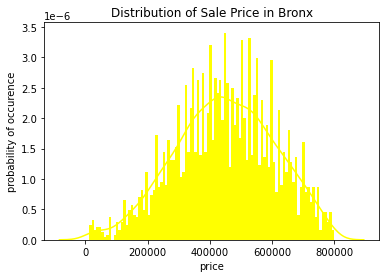

In [48]:
df1=df.groupby("BOROUGH")
br = df1.get_group('Bronx')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=100,
                  color='yellow',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='price', ylabel='probability of occurence', title='Distribution of Sale Price in Bronx')

c:\Users\intan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


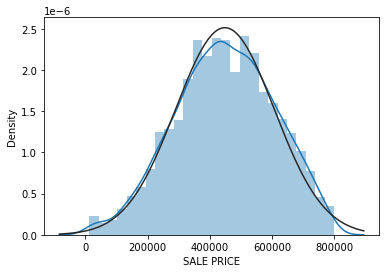

In [49]:
x = pd.Series(br['SALE PRICE'].values, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)

Berdasarkan hasil di atas dapat disimpulkan bahwa 'SALE PRICE' wilayah Bronx dan Manhattan berdistribusi normal

##### Confidence Interval

In [50]:
# Menghitung mean dan standard deviasi
mean = data.mean()
std = data.std()

<ipython-input-50-11705c90a98f>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = data.mean()


In [51]:
# Menghitung confidence interval pada tingkat kepercayaan 95% dengan rumus yang ada
confidence_interval = np.array([mean - 1.96 * std, mean + 1.96 * std])
print("Confidence interval at 95%:", confidence_interval)

Confidence interval at 95%: [[-2878.6611105573747 -21.068060585085025 -62557.52027411467
  -60486.02308963773 -833.8915735877456 -36.41974386184357 NaT
  -24029190.515057273 -41.85262320237487]
 [12242.46970870272 21.57727565511956 70150.57183970656 67748.24300970913
  1614.6251319627893 41.70488722893316 NaT 26976437.749061853
  47.70106925056484]]


Di atas adalah confidence interval pada tingkat kepercayaan 95%

Membuat dataframe

In [52]:
CI=df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
CI

SALE PRICE                        
                        mean            std     size
BOROUGH                                             
Manhattan      540871.630934  109221.638628   3181.0
Bronx          448221.910236  158570.756499   3097.0
Brooklyn       506525.692929  195792.624077   5077.0
Queens         512513.827403  135339.181140  15458.0
Staten Island  475511.350783  139262.818182   7087.0

In [53]:
mean_CI = CI.iloc [1,0]  
std_CI = CI.iloc [1,1]

In [54]:
CI_ = np.array([mean_CI - 1.96 * std_CI, mean_CI + 1.96 * std_CI])
print("Confidence interval at 95%:", confidence_interval)

Confidence interval at 95%: [[-2878.6611105573747 -21.068060585085025 -62557.52027411467
  -60486.02308963773 -833.8915735877456 -36.41974386184357 NaT
  -24029190.515057273 -41.85262320237487]
 [12242.46970870272 21.57727565511956 70150.57183970656 67748.24300970913
  1614.6251319627893 41.70488722893316 NaT 26976437.749061853
  47.70106925056484]]


##### Hypothesis Testing

H0 : Sampel berdistribusi Gaussian.

H1 : Sampel tidak memiliki distribusi Gaussian.

Tes Shapiro-Wilk

Setiap sampel independen dan terdistribusi secara identik

In [55]:
df1=df.groupby("BOROUGH")
manhattan = df1.get_group('Manhattan')
SP = manhattan['SALE PRICE']

stat, p = shapiro(SP)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.606, p=0.000
Probably not Gaussian


Berdasarkan hasil di atas, p-value bernilai < 0.5 sehingga H0 ditolak (tidak berdistribusi Gaussian)

#### Overall Analysis

Berdasarkan program yang telah dibuat diatas, dapat diambil beberapa kesimpulan sebagai berikut:
1) Mean diartikan sebagai rata-rata dari data (numerik). Pada output diatas dapat dilihat mean dari setiap kolom yang ada.

2) Median merupakan nilai tengah dari semua data yang telah diurutkan dari nilai terkecil hingga terbesar. Median dari setiap kolom pada dataset ini dapat dilihat pada output di atas.

3) Modus adalah nilai yang paling sering muncul dalam data (dapat berupa numerik maupun object). Modus dari setiap kolom pada dataset dapat dilihat pada output di atas.

4) Standard Deviasi diartikan sebagai ukuran penyebaran data dari mean (rata-rata jarak dari setiap data ke mean). Standard deviasi dari setiap kolom pada dataset dapat dilihat pada output di atas.

5) Range merupakan selisih dari nilai tertinggi dan terendah pada data. Selisih antara harga jual termahal dan termurah dari dataset adalah 2210000000 (seperti output di atas)
6) Variance adalah kuadrat ukuran penyebaran data dari mean. Rata-rata kuadrat jarak dari setiap data ke mean dapat dilihat pada output di atas.

7) Probability Distribution merupakan distribusi probabilitas dari semua data. Berdasarkan output di atas, pada dataset yang ada sekitar 70% memiliki harga jual dibawah $1 juta, sekitar 10% memiliki harga jual $1 juta - $2 juta, sekitar 10% memiliki harga jual $2 juta - $3 juta, dan sekitar 10% memiliki harga jual di atas $3 juta. Dapat disimpulkan bahwa data memiliki distribusi yang miring ke kanan.

8) Confidence Interval adalah interval kepercayaan dari mean. Hasil confidence interval di atas menggunakan tingkat kepercayaan 95%. Hal tersebut berarti, dengan tingkat kepercayaan 95%, mean sebenarnya berada pada interval [-2756.5773, 24361.8476].

9) Berdasarkan kasus yang diolah, wilayah Manhattan merupakan wilayah dengan rata-rata harga tertinggi dan Bronx memiliki rata-rata harga terendah dengan data berdistribusi normal. Kemudian, Measures of Central Tendency dan Measures of Spread secara rinci dapat dilihat pada output-output di atas.

10) Dataset yang digunakan memerlukan preprocessing data yang cukup panjang dan dataset yang digunakan berdistribusi besar dengan sebagian besar tidak normal.